## Emotion Classifier

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import nltk
import tqdm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.probability import FreqDist


In [2]:
data = pd.read_csv('emotion_train_data.csv', sep=';',index_col=None)
data.columns = ['feelings','emotion']

In [3]:
data.head()

,feelings,emotion
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [4]:
data.shape

(15999, 2)

In [5]:
data.isna().sum()

feelings    0
emotion     0
dtype: int64

In [6]:
# class label 
d ={'sadness':0,'anger':1,'fear':2,'surprise':3,'love':4,'joy':5}
data['class_label'] =data['emotion'].map(d)


In [7]:
data.head()

,feelings,emotion,class_label
0,i can go from feeling so hopeless to so damned...,sadness,0
1,im grabbing a minute to post i feel greedy wrong,anger,1
2,i am ever feeling nostalgic about the fireplac...,love,4
3,i am feeling grouchy,anger,1
4,ive been feeling a little burdened lately wasn...,sadness,0


### Data Preprocessing

In [8]:
import preprocess_kgptalkie as kgp

In [10]:
data['words_length'] = data['feelings'].apply(lambda x: kgp.get_avg_wordlength(x))
data['words_count'] = data['feelings'].apply(lambda x: kgp.get_wordcounts(x))
data['charcounts'] = data['feelings'].apply(lambda x: kgp.get_charcounts(x))
data['stopwords_count'] =data['feelings'].apply(lambda x: kgp.get_stopwords_counts(x))
data.head()

,feelings,emotion,class_label,words_length,words_count,charcounts,stopwords_count
0,i can go from feeling so hopeless to so damned...,sadness,0,4.190476,21,88,15
1,im grabbing a minute to post i feel greedy wrong,anger,1,3.900000,10,39,3
2,i am ever feeling nostalgic about the fireplac...,love,4,4.166667,18,75,13
3,i am feeling grouchy,anger,1,4.250000,4,17,2
4,ive been feeling a little burdened lately wasn...,sadness,0,4.500000,12,54,5


In [11]:
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

In [12]:
# preprocess the text
def preprocess_text(text_data):
    preprocessed_data =[]
    
    for word in tqdm(text_data):
        # removing puntuations
        word = re.sub(r'[^\w\s]',' ',word)
        
        preprocessed_data.append(' '.join(token.lower()
                                         for token in nltk.word_tokenize(word)
                                         if token.lower() not in stopwords.words('english')))
    return preprocessed_data
    

In [13]:
# applying preprocessed text function
preprocessed_review = preprocess_text(data['feelings'])
data['feelings'] =preprocessed_review

100%|████████████████████████████████████████████████████████████████████████████| 15999/15999 [12:47<00:00, 20.85it/s]


### Exploratory Data Analysis

In [14]:
data.head()

,feelings,emotion,class_label,words_length,words_count,charcounts,stopwords_count
0,go feeling hopeless damned hopeful around some...,sadness,0,4.190476,21,88,15
1,im grabbing minute post feel greedy wrong,anger,1,3.900000,10,39,3
2,ever feeling nostalgic fireplace know still pr...,love,4,4.166667,18,75,13
3,feeling grouchy,anger,1,4.250000,4,17,2
4,ive feeling little burdened lately wasnt sure,sadness,0,4.500000,12,54,5


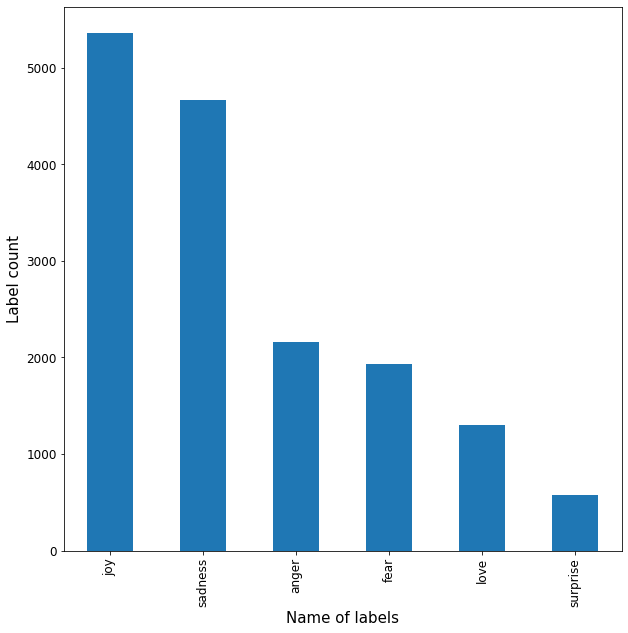

In [15]:
label_count = data['emotion'].value_counts()
# visualize the label count
plt.figure(figsize=(10,10))

label_count.plot(kind='bar')
plt.xlabel('Name of labels',fontsize=15)
plt.ylabel('Label count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [16]:
from nltk.probability import FreqDist
num_word = data['feelings'].tolist()
count_word =FreqDist(num_word)
count_word.most_common(10)

[('feel wronged', 5),
 ('feeling grouchy', 3),
 ('feel confused', 3),
 ('im feeling little stressed', 3),
 ('feel accepted', 3),
 ('feel sad', 3),
 ('feel listless', 3),
 ('feel proud', 3),
 ('feel scared', 3),
 ('feel unwelcome', 3)]

In [17]:
count_word.max()

'feel wronged'

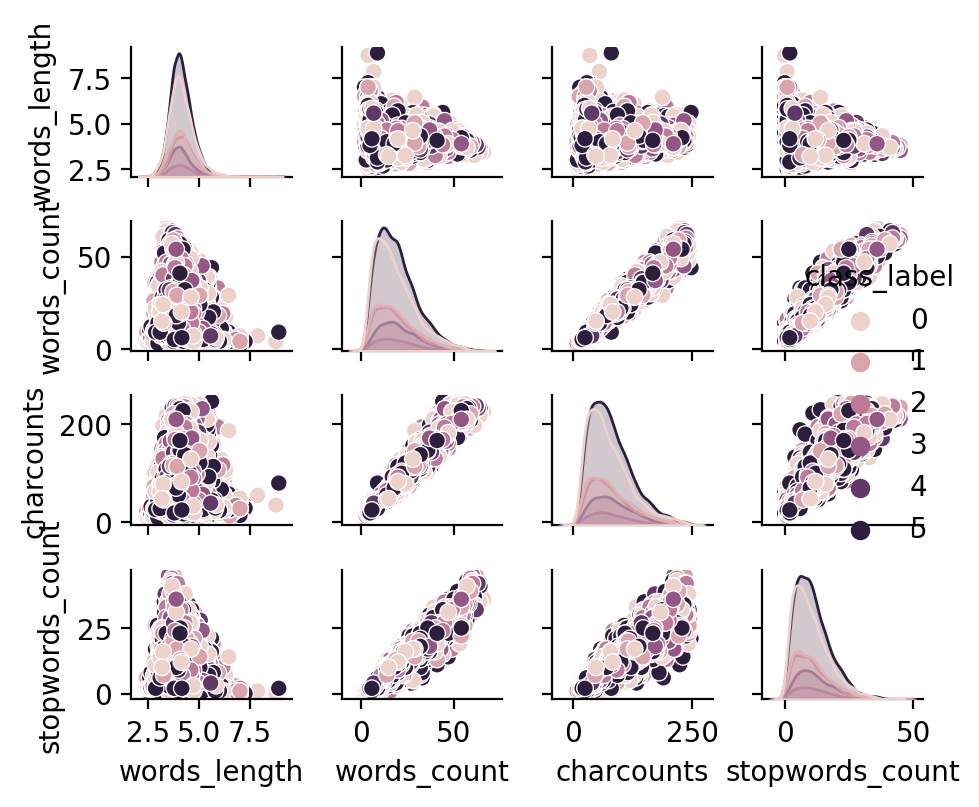

In [22]:
plt.rcParams['figure.dpi'] = 200
sns.pairplot(data, hue='class_label',height=1, aspect=1)
plt.tight_layout()
plt.show()

# Lets have a picture of the words 
from wordcloud import WordCloud

consolid = ' '.join(
    word for word in data['feelings'][data['class_label']==5].astype(str))
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolid),interpolation='bilinear')
plt.axis('off')
plt.show

### Split the dataset into train and test

In [26]:
# Split the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(data['feelings'],data['class_label'],test_size=0.2,random_state=42,stratify=data['class_label'])

In [27]:
x_train.shape, x_test.shape

((12799,), (3200,))

In [29]:
x_train = np.array(x_train)
x_test = np.array(x_test)

### Convert word into a vector form


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

In [31]:
x_train.T.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
#save tfidf model
pickle.dump(vector,open('tfidf_vectorizer.pkl','wb'))

### Model predictions and prediction

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr_model = LogisticRegression()

In [35]:
## train the model
lr_model.fit(x_train,y_train)

LogisticRegression()

In [36]:
# model test
lr_pred = lr_model.predict(x_test)

In [39]:
# evaluation
from sklearn.metrics import classification_report,accuracy_score

In [40]:
print(accuracy_score(y_test,lr_pred))

0.858125


In [41]:
# RandomforestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=100)

In [42]:
# train and test the model
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

In [45]:
# Accuracy score
print(accuracy_score(y_test,rf_pred))

0.8865625


#### RandomSearch to optimize the model

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# parameters
param_dist = {'max_depth':[2,4,6,8,None],
             
             'criterion':['gini','entropy','log_loss'],
              'n_estimators':[100,250,570,800,1000],
              'max_features':['sqrt','log2',None,'auto']
              
             }

In [48]:
tuned_rf_model = RandomizedSearchCV(rf_model, param_distributions=param_dist,cv=3,verbose=10,n_jobs=-1)

In [49]:
# train the tuned model
tuned_rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 6, 8, None],
                                        'max_features': ['sqrt', 'log2', None,
                                                         'auto'],
                                        'n_estimators': [100, 250, 570, 800,
                                                         1000]},
                   verbose=10)

In [50]:
tuned_rf_model.best_estimator_


RandomForestClassifier(criterion='log_loss', max_features=None,
                       random_state=100)

In [51]:
tuned_rf_model.best_score_

0.8625673986074034

In [52]:
tuned_rf_model_pred = tuned_rf_model.predict(x_test)

In [53]:
print(accuracy_score(y_test,tuned_rf_model_pred))

0.8759375


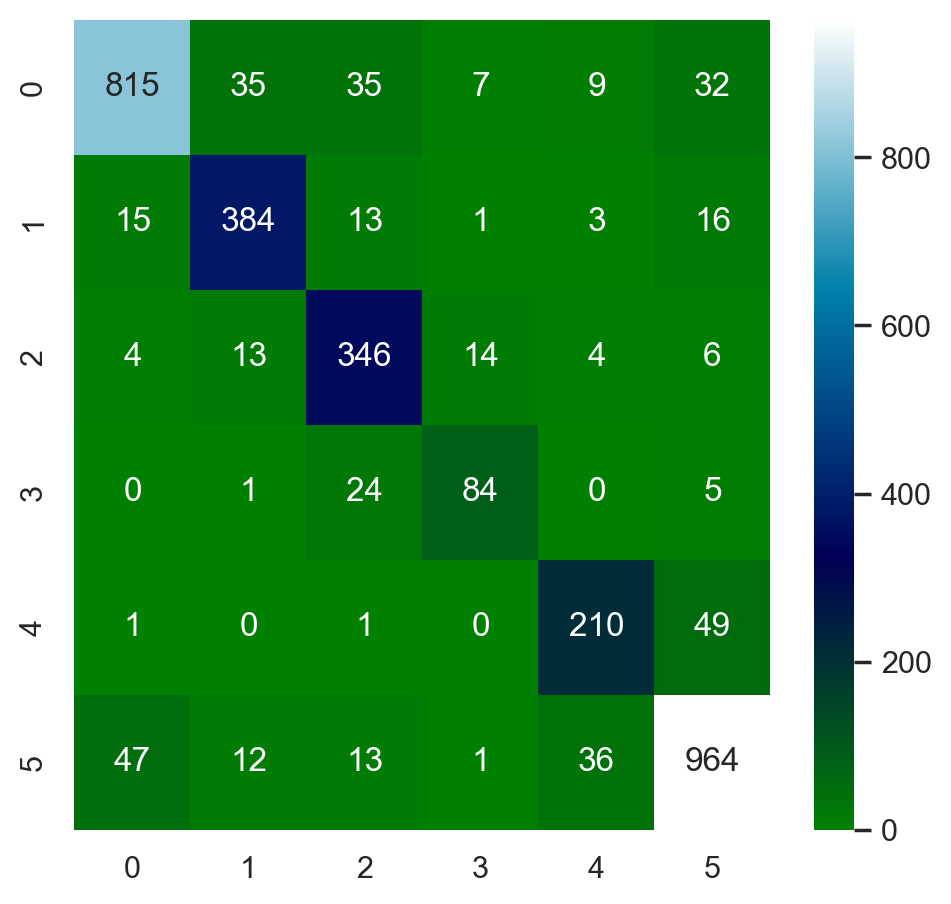

In [56]:
# lets visualize the predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,tuned_rf_model_pred)
sns.set_theme()
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,cmap="ocean",fmt="d")
plt.show()


In [54]:
# Save the tuned model
import pickle
pickle.dump(rf_model,open('rf_model.pkl','wb'))

In [108]:
## Create function to take input and preprocess it for prediction

def testing(text):
    sentence = re.sub(r'[^\w\s]',' ',text)
    word = [' '.join(token.lower() for token in nltk.word_tokenize(sentence)
                    if token not in stopwords.words('english'))]
    word = vector.transform(word)
    return word
    

In [131]:
data.tail(3)

,feelings,emotion,class_label
15996,feel strong good overall,joy,5
15997,feel like rude comment im glad,anger,1
15998,know lot feel stupid portray,sadness,0


In [128]:
feeling ='#feel romantic'


In [129]:
test_data = testing(feeling)

In [127]:
# load the saved model to make prediction
model = pickle.load(open('RF_model.pkl','rb'))

In [130]:
model.predict(test_data)

array([4], dtype=int64)

### XGBoostClassifier

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [58]:
# train the model
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [59]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       933
           1       0.92      0.85      0.88       432
           2       0.84      0.88      0.86       387
           3       0.81      0.75      0.78       114
           4       0.78      0.82      0.80       261
           5       0.88      0.93      0.91      1073

    accuracy                           0.89      3200
   macro avg       0.86      0.86      0.86      3200
weighted avg       0.89      0.89      0.89      3200



In [60]:
print(pd.crosstab(y_test,xgb_pred))

col_0          0    1    2   3    4    5
class_label                             
0            845   20   24   4    9   31
1             20  366   10   1    2   33
2              4    7  341  14    5   16
3              1    1   20  86    1    5
4              1    1    1   0  213   45
5             18    3    8   1   44  999


In [61]:
# save xgbClassifier model
pickle.dump(xgb,open('xgb_model.pkl','wb'))

In [30]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
# Hypertunning the xgb model

params = {'max_depth':[2,4,6,8,12],
         'min_child_weight':[3.5,1.1,5.1,1.5,2.0],
         'subsample':[0.001,0.01,0.02,0.1,0.5],
         'learning_rate':[0.0001,0.001,0.01,0.1],
         'n_estimators':[120,430,563,677,1000]
         }




In [32]:
xgb_tuned = RandomizedSearchCV(xgb,param_distributions=params, cv=3, verbose=10, n_jobs=-1, random_state=2120)

In [ ]:
# train the model
xgb_tuned.fit(x_train,y_train)
xgb_tuned_pred = xgb_tuned.pred(x_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
